I'm no expert on Wishart matrices, so the below will be fairly sketchy. But here's an outline of an argument and some empirical results supporting the broad strokes of it. If you think this is promising for your application, we can plan a bit about what is worth proving and how much time to spend on it. 

If I understand your context correct, your data for this problem is a covariance matrix $\Sigma = \mathbb{E}[\mathbf{Y}\mathbf{Y}^T]$ of correlations between system states encoded by $\mathbf{Y}$, in which the rows of $\mathbf{Y}$ are states and the columns of $\mathbf{Y}$ are observations. Suppose there are $n$ states.

<font color='orange'>Alice: I would write $\Sigma = \mathbf{Y}\mathbf{Y}^T$. What are you taking the expectation of in your equation above?</font>

Fix $k$. Let $C_k \triangleq \left\{S \subseteq 2^{[n]} | \left|S\right| = k\right\}$, and let $I \sim \text{uniform}(C_k)$. We're interested in the random variable  

$$
    X = \log \left|\Sigma_I\right|\;,
$$

where $\left|A\right|$ is the determinant of $A$ and $\Sigma_I$ is the principal submatrix of $\Sigma$ determined by the (random) indices $I$. 

# A Naive Scaling Argument for $\mathbb{E}[X]$

The following is short, sweet, and hand-wavy. 

**Conjecture**: *With high probability,* $\mathbb{E}[X] = (k + o(k))(\log k - 1)$.

**Intuition**: $\left|\Sigma_I\right|$ has $k!$ terms, each of which is a product of $k$ entries of $\Sigma$. Here's the hand-wavy bit: we're going to estimate the size of a "typical" term $t_\sigma = (-1)^{\text{sgn}\sigma} \prod_{i \in I} s_{\sigma(i)}$ corresponding to permutation $\sigma$. We'd like to write something like this: 
$$
    \begin{aligned}
    \mathbb{E} [\log t_\sigma] &= \mathbb{E} \left[\log (-1)^{\text{sgn}\sigma}\prod_i s_{\sigma(i)} \right] \\ 
    &\leq \mathbb{E} \left[\log \prod_i s_{\sigma(i)} \right] \\ 
    &= \mathbb{E} \sum_{i} \log s_\sigma(i) \\ 
    &\approx k \log \hat{s}_I\;.
    \end{aligned}
$$
The expectation is over terms of $\left|\Sigma_I\right|$. The second line is Jensen's inequality, and in the last line we've just defined $\hat{s}_I$ to make this true. Nothing above is formally invalid if we define $\log x = -\infty$ when $x < 0$, but the fact that we have to do so might make things very loose. 

Let's act like dirty physicists and ignore those concerns for now. We've argued that a typical term of $\left|\Sigma_I\right|$ has size about $\hat{s}_I^k$. There are $k!$ of them, so let's estimate

$$
    \begin{aligned}
        X &= \log \left|\Sigma_I\right| \\ 
          &\approx \log k!\hat{s}_I^k \\ 
          &= k\log \hat{s}_I + k(\log k - 1) + o(\log k) \\ 
          &= (k + o(k))(\log k - 1)  + o(\log k) \\ 
          &= (k + o(k))(\log k - 1)\;, 
    \end{aligned}
$$
which was the claim. We've used the vanilla Stirling approximation in the third line. 

<font color='orange'>Alice: What a daring approximation of the determinant of a Wishart matrix! It honestly surprised me how well it worked for your numerics below. Impressive!</font>

# Numerical Experiment

Let's try this out. For this sketch, we'll just consider the same Wigner matrices as in your illustration code. Since our random variable is a single principal minor, we can just generate independent matrices each time. 

<font color='orange'>Alice: I think the last statement in the cell above in incorrect. I am interested in the expected mean and expected standard deviation, where we take
<ol>
    <li>the mean and standard deviation over all $\binom{n}{k}$ principal submatrices of a single realisation of the Wishart ensemble and </li>
    <li>the expectation of the Wishart ensemble.</li>
</ol>

Our random variable is therefore the set of $\binom{n}{k}$ principal minors, not just a single one. The distinction matters. For example, take principal minors of size $n-1$ (where $n$ is the size of the full Wigner matrix). Consider two $(n-1)$-minors, $m_1$ and $m_2$. The two submatrices share a lot elements, so it makes sense to assume that knowledge of $m_1$ should tell you something about $m_2$ that you would not have known just from the size of the submatrix and properties of the Wishart ensemble. <p>

It may be that the distinction does not matter for the mean, i.e.,
<p>$$
\begin{aligned}
    \log \left|\Sigma_I\right| \approx \log \left|\Sigma'\right|\,,
\end{aligned}
$$<br>

where $\Sigma$ is a $n\times n$ Wishart matrix, $I$ a set of $k$ indices, and $\Sigma'$ is a $k\times k$ Wishart matrix. However, it certainly matters for the standard deviation. In the first table in the other notebook, one can see that the standard deviation of log-minors changes when one increases $n$ while $k$ is fixed. So both $n$ and $k$ should matter. An extreme case of this occurs for $k=n$. Then $\binom{n}{k}=1$, so the set of all principal minors has just one element and its standard deviation is 0.</font>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def experiment(int_n, int_m = 20):
    def getWishart(int_n):
        X = np.random.normal(size=(int_n,int_n))
        return np.matmul(X.T,X)
    def WishartLogDet(int_n):
        X = getWishart(int_n)
        d = np.linalg.slogdet(X)
        return d
    dets = [WishartLogDet(int_n) for i in np.arange(0, int_m)]
    mu = np.mean(dets)
    v  = np.var(dets)
    return (mu, v)

<font color='orange'>Alice: I think I caused some confusion by mixing up Wigner and Wishart in the previous notebook. Have corrected it in both.</font>

For each dimension $k$, we'll generate a Wigner matrix and compute it's log determinant 50 times, then compute the mean and variance of the results. First the mean.  

In [5]:
k = np.arange(1, 500, 1)
experiments = [experiment(n, 50) for n in k]
mu, v = zip(*experiments)
scale = k * (np.log(k) -1)

(0.48, 0.52)

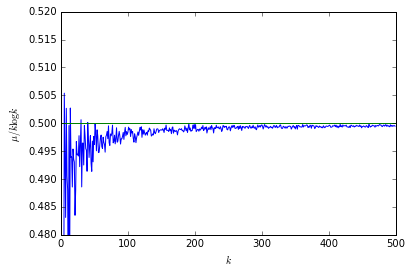

In [6]:
plt.plot(k, mu/scale)
plt.plot(k, np.repeat(0.5, len(k)))
plt.ylabel(r'$\mu / k \log k$')
plt.xlabel(r'$k$')
plt.ylim(.48, .52)

It appears that 
$$
    \frac{\mathbb{E}[X]}{k (\log k - 1)} \rightarrow \frac{1}{2}
$$
as $k$ grows large, which would suggest that the above conjecture is correct modulo a factor of 2. A better argument would (a) be rigorous and (b) get that factor correct. In general, I'd conjecture that it depends on the system under study... 

<font color='orange'>Alice: Again, I am very impressed by this. I haven't looked it up, but I assume that results on the expectation of determinants of Wishart matrices exist. It would be interesting to see how close your bound is to whatever is the best bound currently available.</font>

# What About the Variance?

We've argued that the expected log minor grows only slightly faster than the dimension of the subsystems you care about. What about the variance? I don't have an argument, but here's a plot that came from a guess that was equal parts intuition and luck. 

(0.98, 1.02)

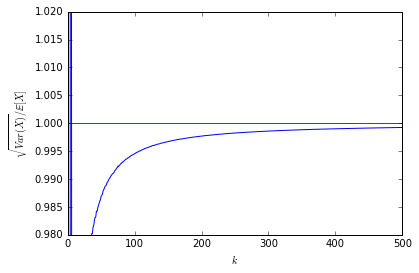

In [7]:
plt.plot(k, np.sqrt(v)/mu)
plt.plot(k, np.repeat(1, len(k)))
plt.ylabel(r'$\sqrt{Var(X)} / \mathbb{E}[X]$')
plt.xlabel(r'$k$')
plt.ylim(.98, 1.02)

This would suggest: 

**Conjecture:** 

$$
    \lim_{k \rightarrow \infty} \frac{\sqrt{\text{Var}(X)}}{\mathbb{E}[X]} = C
$$

*for some constant $C$ that depends on the system.*

In turn, we would have 

$$
    \sqrt{\text{Var}(X)} = C (k + o(k)) (\log k - 1)\;.
$$

In one sense, this is not a very encouraging result. It implies, for example, that Chebyshev-type concentration bounds will not work. On the other hand, maybe this isn't too bad -- to estimate the expected entropy over subsystems of size $k$, you need to sample about $ q k \log k$ principal minors for some small-ish constant $q$ that depends on the statistical power you want. And, after all, 

$$
    q k \log k \ll \binom{n}{k} \approx \frac{n^k}{k!}\;,
$$
so that's something...

<font color='orange'>Alice: In a way, that is good news. If the log-determinants of Wishart matrices would converge in the limit of large systems, then that would mean the entropy of any system with many particles would only depend on the number of particles in the system and nothing else. So existential crisis in information theory averted!</font>

# Next?....

If you think any of this is promising and worth working out in more detail, let me know! 